PS: Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1509, 1)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [ ]:
## 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1449, 60)

In [ ]:
y_train.shape

(1449,)

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1449, 60, 1)

In [ ]:
# plt.figure(figsize=(18, 8))
# plt.plot(dataset_train['Open'])
# plt.title("Google Stock Open Prices")
# plt.xlabel("Time (oldest -> latest)")
# plt.ylabel("Stock Open Price")
# plt.show()

In [ ]:
# plt.figure(figsize=(18, 8))
# plt.plot(dataset_train['Low'])
# plt.title("Google Stock Low Prices")
# plt.xlabel("Time (oldest -> latest)")
# plt.ylabel("Stock Lowest Price")
# plt.show()

In [ ]:
regressor = Sequential()

#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

# 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

# output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 13s 102ms/step - loss: 0.0228
Epoch 2/100
46/46 [==============================] - 8s 183ms/step - loss: 0.0034
Epoch 3/100
46/46 [==============================] - 8s 168ms/step - loss: 0.0031
Epoch 4/100
46/46 [==============================] - 6s 129ms/step - loss: 0.0029
Epoch 5/100
46/46 [==============================] - 6s 128ms/step - loss: 0.0031
Epoch 6/100
46/46 [==============================] - 8s 169ms/step - loss: 0.0033
Epoch 7/100
46/46 [==============================] - 4s 98ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 5s 109ms/step - loss: 0.0024
Epoch 9/100
46/46 [==============================] - 5s 108ms/step - loss: 0.0024
Epoch 10/100
46/46 [==============================] - 6s 136ms/step - loss: 0.0025
Epoch 11/100
46/46 [==============================] - 7s 160ms/step - loss: 0.0026
Epoch 12/100
46/46 [==============================] - 5s 98ms/step - loss: 0.0025
Epoch 13/100
4

In [ ]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/PROxZIMA/Academic-Codes/master/Semester%208/LP5/DL/4/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(125, 60, 1)

In [ ]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 27ms/step


In [ ]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

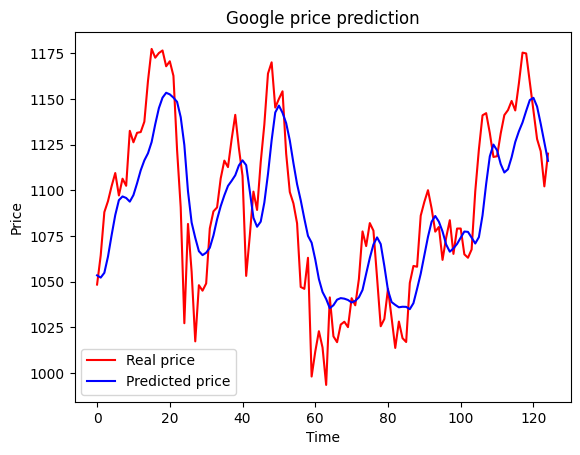

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Simple Version... still in progress!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/SameerBramhecha/LP-5/master/DL/goog1.csv')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
train_data = scaled_data[:int(len(scaled_data) * 0.8)]

test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [ ]:
def create_sequences(data, time_steps=6):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=4)

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 [==============================] - 0s 54ms/step


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  13.642490868861598
MSE:  189.68736468475632
RMSE:  13.772703608397165


In [ ]:
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

In [ ]:
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)

print('Predicted price for the next day: ', pred_price)

1/1 [==============================] - 0s 49ms/step
Predicted price for the next day:  [[836.2109]]


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


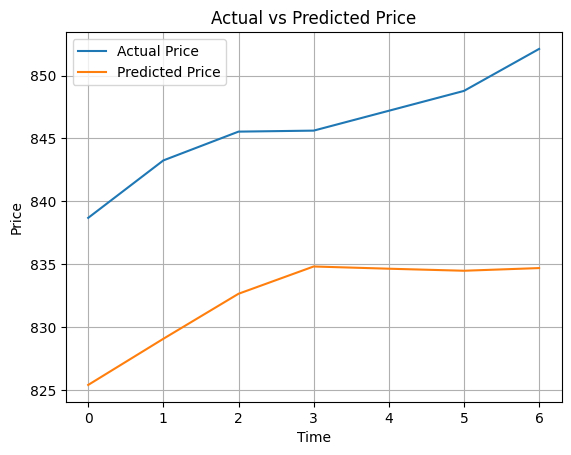

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()